In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Load the CSV files
train_df = pd.read_csv('/content/sample_data/train.csv')
test_df = pd.read_csv('/content/sample_data/test.csv')
gender_df = pd.read_csv('/content/sample_data/gender_submission.csv')



In [ ]:
# View first few rows
print(train_df.head())
print(test_df.head())
print(gender_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [ ]:
print("\nDataset Info:")
print(train_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print("\nDataset Info:")
print(test_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [ ]:
print("\nMissing Values:\n", train_df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#Data cleaning
# 1. Drop 'Cabin' column (too many missing values)
train_df.drop(columns=["Cabin"], inplace=True)

In [ ]:
# 2. Fill missing 'Age' values with median
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)


<ipython-input-10-78d0c50a40ba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)


In [ ]:
# 3. Fill missing 'Embarked' values with mode
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

<ipython-input-11-056a6570a6a5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)


In [ ]:
# Confirm no missing values remain
print("\nMissing Values After Cleaning:\n", train_df.isnull().sum())


Missing Values After Cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


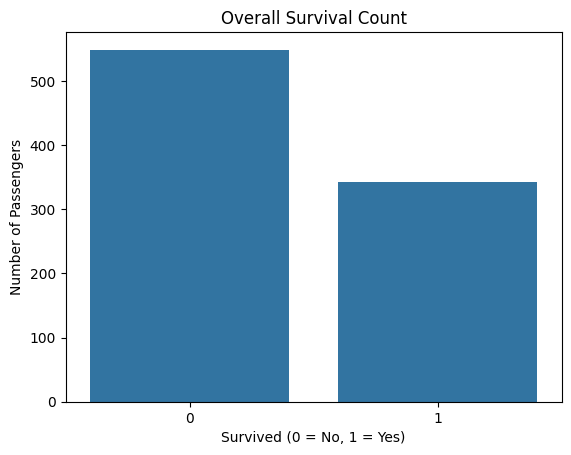

In [ ]:
#EXPLORATORY DATA ANALYSIS
# 1. Overall Survival Count
sns.countplot(x="Survived", data=train_df)
plt.title("Overall Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

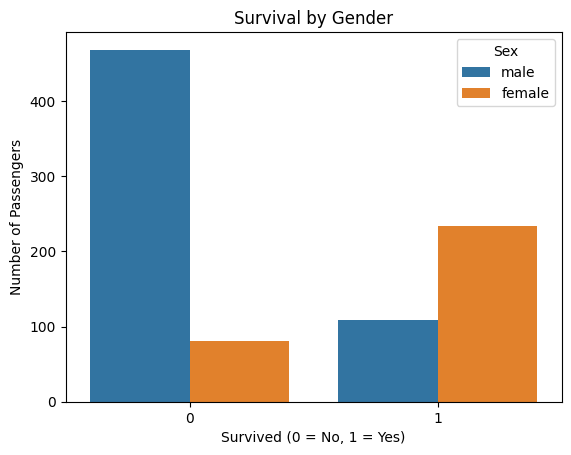

In [ ]:
# 2. Survival by Gender
sns.countplot(x="Survived", hue="Sex", data=train_df)
plt.title("Survival by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.legend(title="Sex")
plt.show()

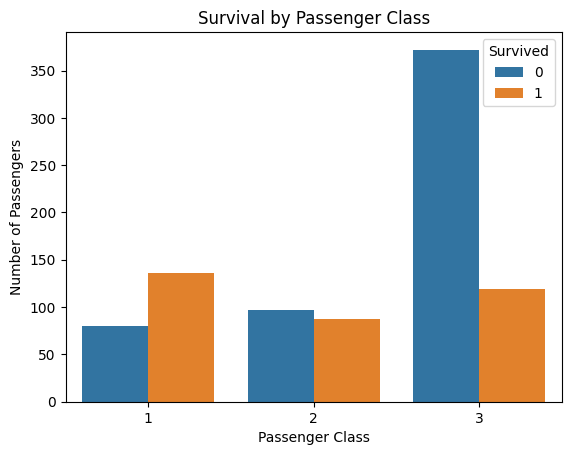

In [ ]:
# 3. Survival by Passenger Class
sns.countplot(x="Pclass", hue="Survived", data=train_df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived")
plt.show()

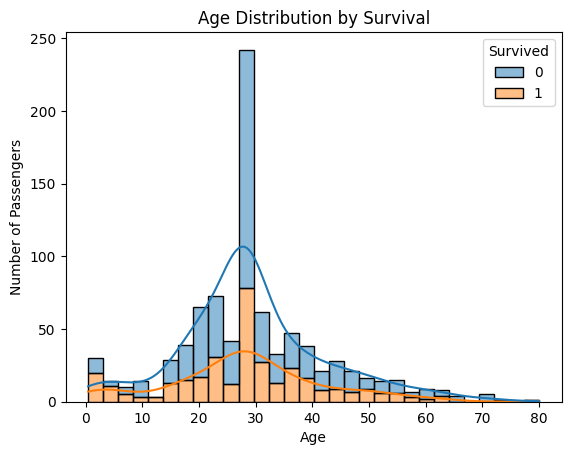

In [ ]:
# 4. Age Distribution by Survival
sns.histplot(data=train_df, x="Age", hue="Survived", multiple="stack", kde=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

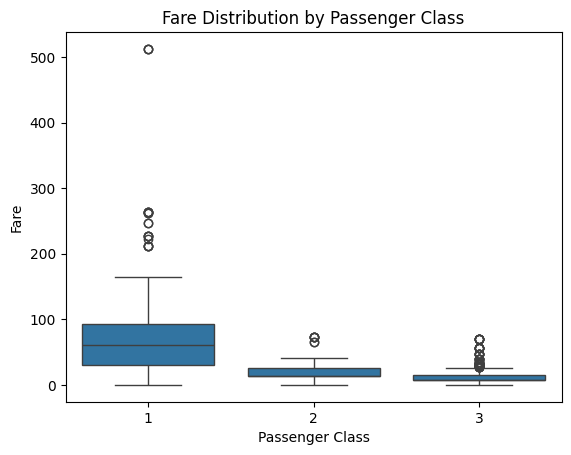

In [ ]:
# 5. Fare Distribution by Class
sns.boxplot(x="Pclass", y="Fare", data=train_df)
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

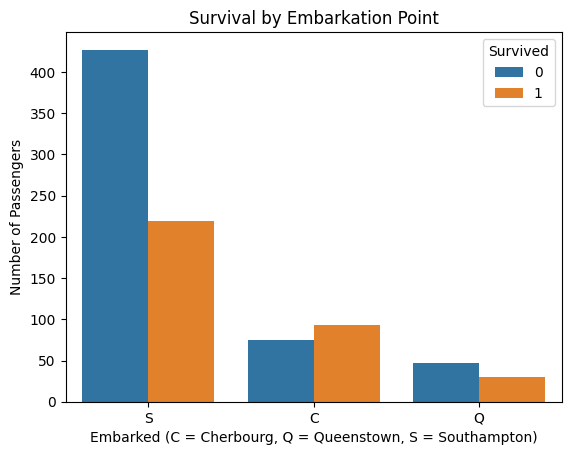

In [ ]:
# 6. Embarkation Point vs Survival
sns.countplot(x="Embarked", hue="Survived", data=train_df)
plt.title("Survival by Embarkation Point")
plt.xlabel("Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived")
plt.show()

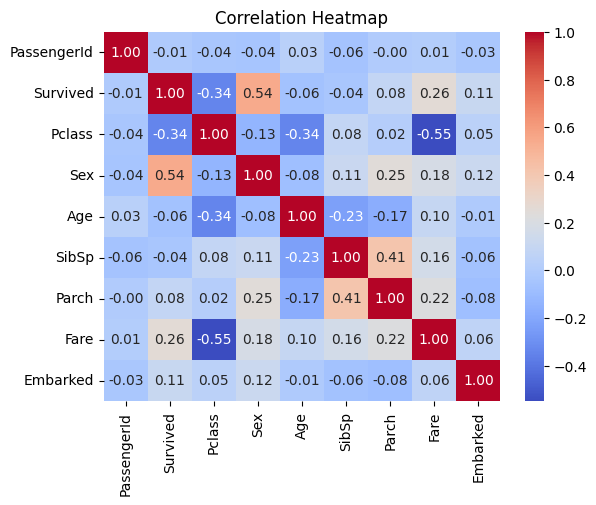

In [ ]:
# Convert categorical columns for correlation
train_df_corr = train_df.copy()

# Convert 'Sex' and 'Embarked' into numeric values
train_df_corr["Sex"] = train_df_corr["Sex"].map({"male": 0, "female": 1})
train_df_corr["Embarked"] = train_df_corr["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Remove non-numeric columns that can't be used in correlation

non_numeric_columns = ['Name', 'Ticket']  # Add other non-numeric columns if needed
train_df_corr = train_df_corr.drop(columns=non_numeric_columns)

# Correlation matrix
corr_matrix = train_df_corr.corr()

# Correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
print("\n CONCLUSION:")
print("1. Women had a much higher survival rate than men.")
print("2. First-class passengers were more likely to survive.")
print("3. Children had better survival chances than adults.")
print("4. Passengers who embarked at Cherbourg (C) had higher survival rates.")
print("5. Strong positive correlation between 'Sex' (female=1) and 'Survived', indicating that females had a higher survival rate than males.")


 CONCLUSION:
1. Women had a much higher survival rate than men.
2. First-class passengers were more likely to survive.
3. Children had better survival chances than adults.
4. Passengers who embarked at Cherbourg (C) had higher survival rates.
5. Strong positive correlation between 'Sex' (female=1) and 'Survived', indicating that females had a higher survival rate than males.
